In [43]:
# to do: 
# preco x mileage, mileage x brand, preço x brand (yerr)

In [31]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [32]:
data = pd.read_csv("DATASETS/carsUS.csv", encoding="utf-16")
df = pd.DataFrame(data)

In [33]:
df2 = df.copy()

fill_values = {'New': 0, 'Used': -1, 'Certified': -1} # represents unknown values as -1
df2['Mileage'] = df2['Mileage'].fillna(df['Status'].map(fill_values))
df2['Dealer'] = df2['Dealer'].fillna('Unknown')

mean_by_brand = df2.groupby('Brand')['Price'].mean() # calculates the average price by brand
# fills the NaN values in the Price column with the averages of the corresponding brands
df2['Price'] = df2['Price'].fillna(df2['Brand'].map(mean_by_brand))

has_inf = df2[df2.select_dtypes(include=['float']).columns.tolist()].map(np.isinf)
# print(has_inf.any())

df2[['Mileage', 'Price']] = df2[['Mileage', 'Price']].astype('int32')
df2['Year'] = df2['Year'].astype('int16')

top3 = df2.nlargest(3, 'Price')
display(top3) # three most expensive cars

# df2.info()
# display(df2)

Brand     Model  Year Status  Mileage  \
121610     Audi        Q8  2023    New        0   
86879   Bugatti    Chiron  2019   Used     1760   
129461     Jeep  Wagoneer  2022    New        0   

                                                Dealer    Price  
121610                                Audi Orland Park  8078160  
86879   Ferrari Maserati Alfa Romeo of Fort Lauderdale  3399000  
129461              MotorWorld Chrysler Dodge Jeep RAM  3383150

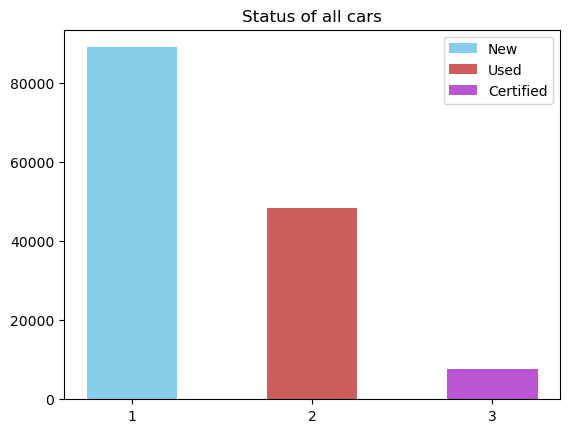

In [42]:
fig, ax = plt.subplots()

status = df2['Status'].value_counts()

pos = np.arange(status.size)
plt.bar(np.array([1, 2, 3]), status.iloc[pos], width=0.5, color=['skyblue', 'indianred', 'mediumorchid'], label=['New', 'Used', 'Certified'])
plt.title('Status of all cars')
plt.xticks(np.array([1, 2, 3]))

plt.legend()
plt.show()